In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
calories= pd.read_csv('calories.csv')
exercise= pd.read_csv('exercise.csv')

In [3]:
calories.head(2)

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0


In [65]:
exercise.head(2)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3


In [66]:
df= exercise.merge(calories, on='User_ID')

In [67]:
df.head(5)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [10]:
df['Gender'].value_counts()


Gender
female    7553
male      7447
Name: count, dtype: int64

(array([1498., 1272., 1238., 1043.,  975.,  889.,  847.,  759.,  725.,
         650.,  642.,  622.,  549.,  551.,  538.,  478.,  449.,  467.,
         398.,  410.]),
 array([20.  , 22.95, 25.9 , 28.85, 31.8 , 34.75, 37.7 , 40.65, 43.6 ,
        46.55, 49.5 , 52.45, 55.4 , 58.35, 61.3 , 64.25, 67.2 , 70.15,
        73.1 , 76.05, 79.  ]),
 <BarContainer object of 20 artists>)

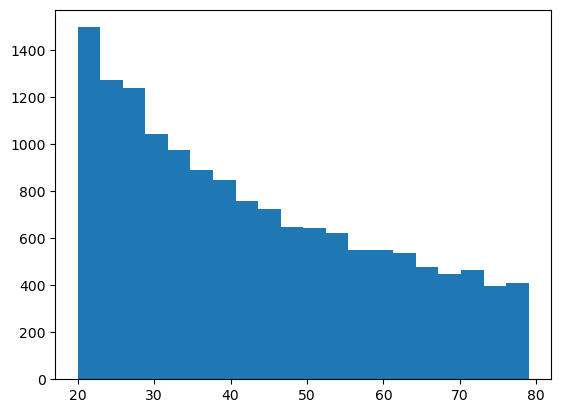

In [68]:
plt.hist(df['Age'], bins=20)

# scatterplot

<Axes: xlabel='Duration', ylabel='Calories'>

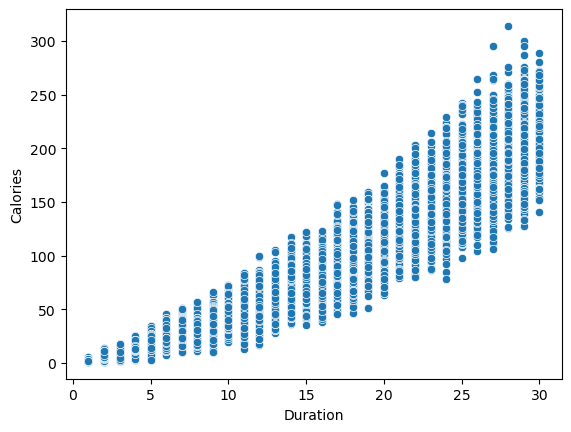

In [69]:
sns.scatterplot(x=df['Duration'], y=df['Calories'])

# bar plot: (numerical to categorical)

<Axes: xlabel='Gender', ylabel='Weight'>

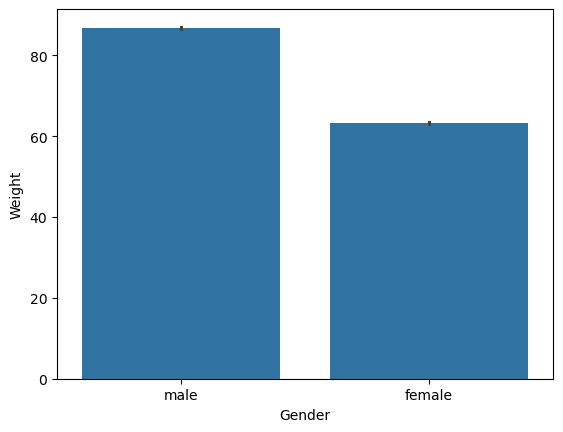

In [70]:
sns.barplot(x='Gender', y='Weight', data=df)

# boxplot: numerical to categorical

<Axes: xlabel='Gender', ylabel='Weight'>

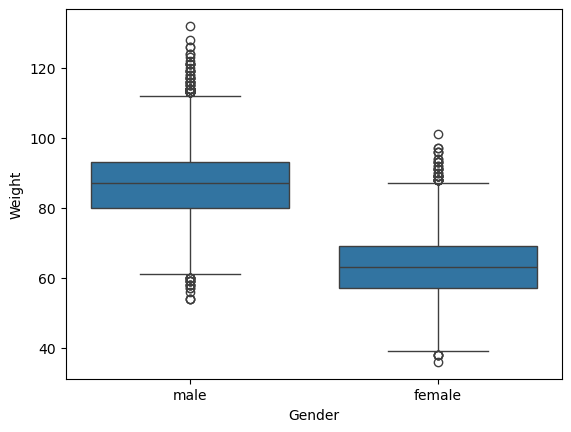

In [71]:
sns.boxplot(x="Gender", y="Weight", data=df) #the lines represent 25%ile, 50%ile, 75%ile respectively


In [72]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Distplot: only numerical

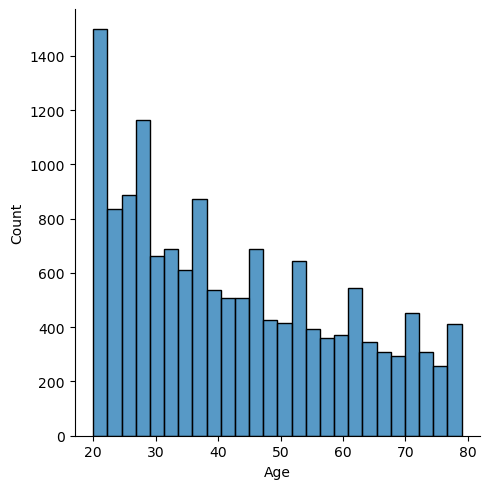

In [73]:
sns.displot(df['Age'])

# Lineplot: numerical to numerical 

<Axes: xlabel='Weight', ylabel='Calories'>

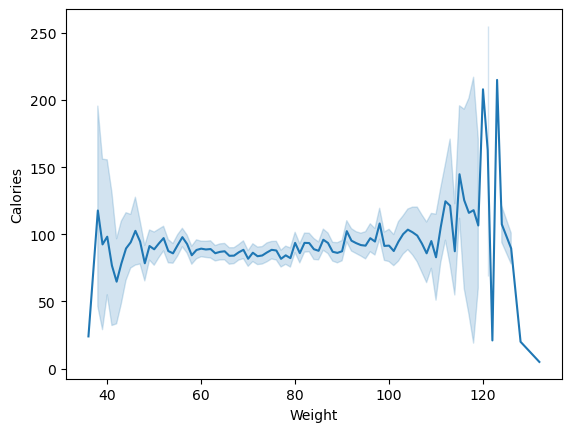

In [74]:
sns.lineplot(x="Weight", y="Calories", data=df)

# encoding

In [75]:
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

In [76]:
df.head(3)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0


# Splitting Training and Testing Set

In [78]:
X= df.drop(['User_ID', 'Calories'],axis=1)
y= df['Calories']

In [79]:
X.shape

(15000, 7)

In [80]:
y.shape

(15000,)

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape

(12000, 7)

In [83]:
X_test.shape

(3000, 7)

# Training Model 

In [84]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [85]:
models= {
    'lr': LinearRegression(),
    'rd': Ridge(),
    'ls': Lasso(),
    'dtr': DecisionTreeRegressor(),
    'rfr': RandomForestRegressor()
}

In [86]:
for name, mod in models.items():
    mod.fit(X_train,y_train)
    y_pred=mod.predict(X_test)

    print(f"{name} mse: {mean_squared_error(y_test,y_pred)} r2 score: {r2_score(y_test,y_pred)}")
    

lr mse: 131.99574575081692 r2 score: 0.9672937151257295
rd mse: 131.99625903139352 r2 score: 0.9672935879435945
ls mse: 143.8268946117506 r2 score: 0.9643621590908397
dtr mse: 28.171666666666667 r2 score: 0.9930195435455745
rfr mse: 7.106774766666667 r2 score: 0.9982390629430233


### we always select the model with low mean squared error and high score
### thus selected model = Random Forest Regressor 

In [87]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)

In [88]:
import pickle
pickle.dump(rfr,open('rfr.pkl','wb'))